In [ ]:
#This file was used to estimate the value of alpha and to determine wheather the output variable should be as it is or a log type

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn import ensemble, metrics
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

C:\Users\Muralish Clint\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
x = pd.read_csv('x.csv') #X variable of training data
y = pd.read_csv('y.csv') #Y variable of training data
test = pd.read_csv('test-final.csv') #Final Testing data
train_analysis = pd.read_csv('train-before one hot encoding.csv')


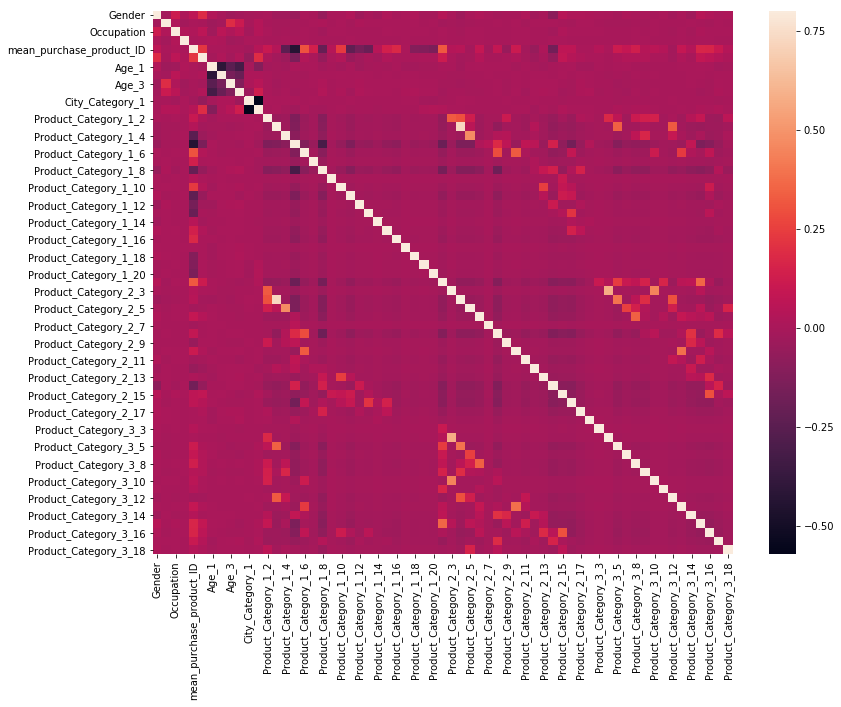

In [3]:
import seaborn as sns
plt.figure(figsize=(13,10))
sns.heatmap(x.corr(), vmax=0.8)

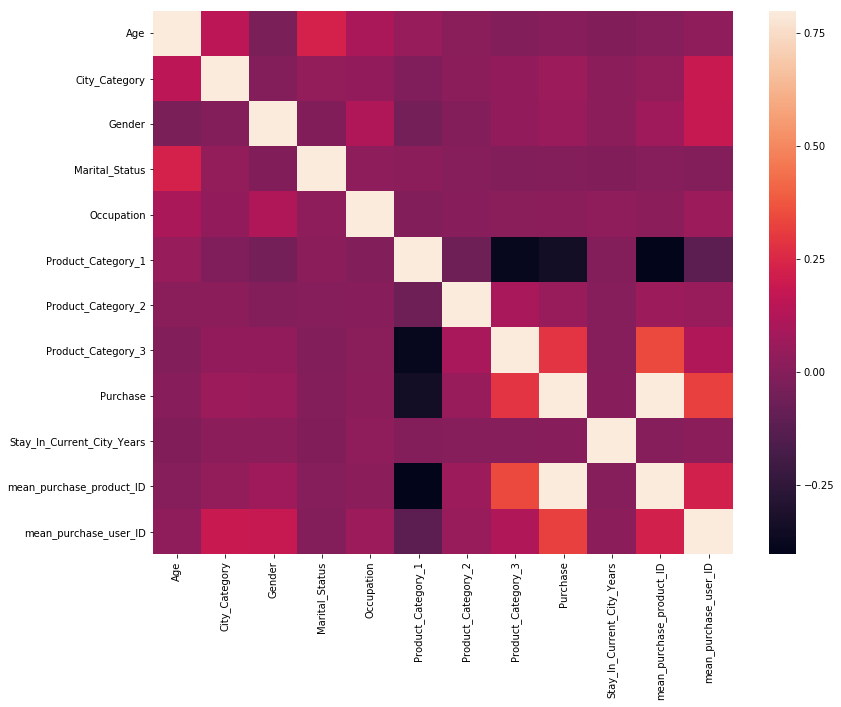

In [4]:
import seaborn as sns
plt.figure(figsize=(13,10))
sns.heatmap(train_analysis.corr(), vmax=0.8)

In [5]:
train_analysis.corr()['Purchase'].sort_values(ascending=False).head(11)

Purchase                      1.000000
mean_purchase_product_ID      0.849659
mean_purchase_user_ID         0.322415
Product_Category_3            0.288501
City_Category                 0.061914
Gender                        0.060346
Product_Category_2            0.052288
Occupation                    0.020833
Age                           0.009397
Stay_In_Current_City_Years    0.005422
Marital_Status               -0.000463
Name: Purchase, dtype: float64

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


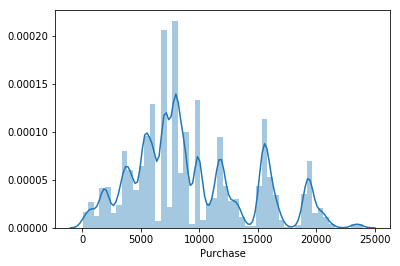

In [6]:
sns.distplot(train_analysis['Purchase'])

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


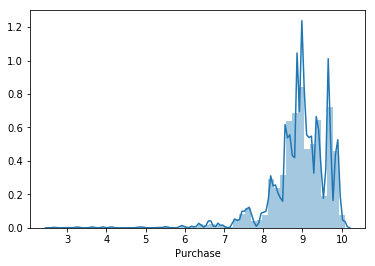

In [7]:
sns.distplot(np.log1p(train_analysis['Purchase']))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(x, y, test_size=0.3, random_state=100)

[4738.592643262244, 4738.590891444829, 4738.587613333572, 4738.578805098272, 4738.5745743787, 4738.597364070935, 4738.746610935017, 4739.666996235052]


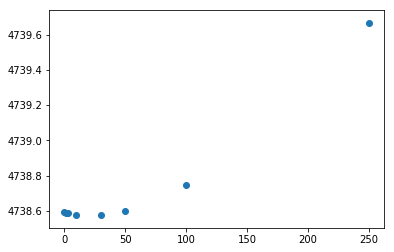

In [5]:
#Import Ridge regression from sklearn
from sklearn.linear_model import Ridge
# Evaluate model performance using root mean square error
from sklearn.metrics import mean_squared_error
rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 1, 3, 10, 30,50,100,250,500]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[4738.592661397784, 4738.58467888978, 4738.578805098272, 4738.574944959476, 4738.57300879271]


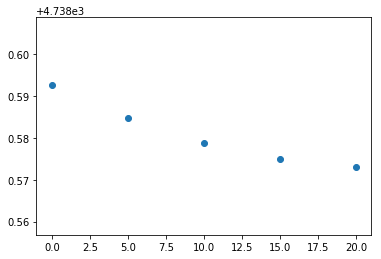

In [9]:
alpha=[0,5,10,15,20]
rmse=[]
for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[4738.578329990673, 4738.578237376899, 4738.578145563992, 4738.57805455122, 4738.577964337853, 4738.577874923157, 4738.577786306405, 4738.577698486866, 4738.577611463812, 4738.577525236516, 4738.5774398042495]
11.499999999999996


C:\Users\muralish\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]


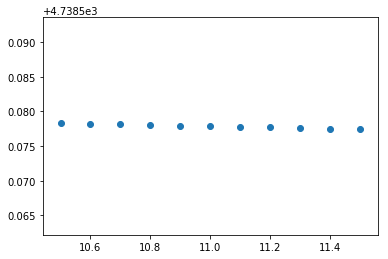

In [11]:
# Adjust alpha based on previous result
alpha=np.arange(10.5, 11.6, 0.1)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


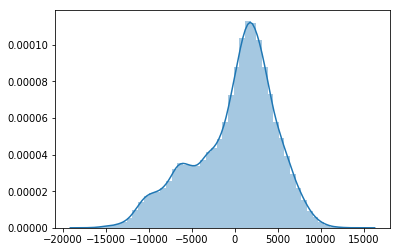

In [12]:
# Check whether the residual satisfy the normality condition
ridge=Ridge(alpha=11.1)
# Use all training data to fit the model
ridge.fit(X_train, y_train)
predicted=ridge.predict(X_val)
residual_y=predicted-y_val
sns.distplot(residual_y)